# ML K-fold vs Holdout


1. Import necessary libraries and load the dataset:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
column_names = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
data = pd.read_csv(url, header=None, names=column_names)

In this notebook, we've imported several libraries to help us load, process, and analyze the data, as well as build and evaluate the classifiers. Here's why we chose each library:

1. **pandas**: This library is great for working with data, especially for loading and manipulating datasets in a tabular format, like our wine dataset.

2. **numpy**: We use this library for numerical operations, such as working with arrays and doing mathematical calculations.

3. **matplotlib.pyplot**: This library helps us create graphs and visualizations to better understand and present the results of our analysis.

4. **sklearn**: This is a popular machine learning library that provides tools for data preprocessing, model building, and evaluation. We've imported various modules and functions from this library:

   - **train_test_split, KFold, cross_val_score**: These functions help us split the data for hold-out testing and k-fold cross-validation, and calculate the evaluation scores.
   
   - **accuracy_score, precision_score, recall_score, f1_score**: These functions calculate the different performance metrics we use to evaluate our classifiers.
   
   - **StandardScaler**: This class standardizes the features in our dataset, which is important for some classifiers, like Support Vector Machines.
   
   - **Pipeline**: This class helps us create a pipeline for preprocessing the data and training the classifiers in a clean and organized way.
   
   - **LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, SVC**: These are the four classifiers we've chosen to compare in this notebook.
   
We've also loaded the wine dataset from the UCI Machine Learning Repository using pandas, and assigned column names to make the dataset easier to work with.


2. Preprocess the dataset and handle missing values:

In [2]:
# Check for missing values
print(data.isna().sum())

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


3. Create the classifiers:

In [3]:
classifiers = [
    ('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(kernel='linear', random_state=42))
]

In this notebook, we've chosen four different classifiers to compare their performance using hold-out testing and k-fold cross-validation. Here's why we picked each one:

1. **Logistic Regression**: This is a simple and widely-used classifier that works well for binary and multi-class problems. It's a good starting point for classification tasks.

2. **Decision Tree**: This classifier is easy to understand and visualize. It can handle both numerical and categorical data and works well with complex datasets.

3. **Random Forest**: This is an ensemble method that builds multiple decision trees and combines their predictions. It often gives better performance than a single decision tree.

4. **Support Vector Machine**: This classifier is effective for high-dimensional datasets and can work well with a clear margin of separation between classes.

We set the `random_state` parameter to 42 for some of the classifiers to ensure that the results are consistent each time we run the code. By setting the same random seed, we can compare the performance of the classifiers fairly and reproduce the results in the future.


4. Perform hold-out testing and k-fold cross-validation, and calculate additional performance measures:

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a k-fold cross-validator with 10 folds
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

results = []

for name, classifier in classifiers:
    # Hold-out testing
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    hold_out_accuracy = accuracy_score(y_test, y_pred)
    hold_out_precision = precision_score(y_test, y_pred, average='weighted')
    hold_out_recall = recall_score(y_test, y_pred, average='weighted')
    hold_out_f1 = f1_score(y_test, y_pred, average='weighted')

    # K-fold cross-validation
    cv_accuracies = cross_val_score(classifier, X, y, cv=kfold, scoring='accuracy')
    cv_precisions = cross_val_score(classifier, X, y, cv=kfold, scoring='precision_weighted')
    cv_recalls = cross_val_score(classifier, X, y, cv=kfold, scoring='recall_weighted')
    cv_f1s = cross_val_score(classifier, X, y, cv=kfold, scoring='f1_weighted')

    results.append((name, hold_out_accuracy, hold_out_precision, hold_out_recall, hold_out_f1, cv_accuracies.mean(), cv_precisions.mean(), cv_recalls.mean(), cv_f1s.mean()))

    print(f"{name}:")
    print(f"  Hold-out accuracy: {hold_out_accuracy:.2f}, precision: {hold_out_precision:.2f}, recall: {hold_out_recall:.2f}, F1-score: {hold_out_f1:.2f}")
    print(f"  K-fold cross-validation mean accuracy: {cv_accuracies.mean():.2f}, precision: {cv_precisions.mean():.2f}, recall: {cv_recalls.mean():.2f}, F1-score: {cv_f1s.mean():.2f}\n")


Logistic Regression:
  Hold-out accuracy: 0.98, precision: 0.98, recall: 0.98, F1-score: 0.98
  K-fold cross-validation mean accuracy: 0.99, precision: 0.99, recall: 0.99, F1-score: 0.99

Decision Tree:
  Hold-out accuracy: 0.96, precision: 0.96, recall: 0.96, F1-score: 0.96
  K-fold cross-validation mean accuracy: 0.90, precision: 0.91, recall: 0.90, F1-score: 0.90

Random Forest:
  Hold-out accuracy: 1.00, precision: 1.00, recall: 1.00, F1-score: 1.00
  K-fold cross-validation mean accuracy: 0.98, precision: 0.99, recall: 0.98, F1-score: 0.98

Support Vector Machine:
  Hold-out accuracy: 0.98, precision: 0.98, recall: 0.98, F1-score: 0.98
  K-fold cross-validation mean accuracy: 0.95, precision: 0.96, recall: 0.95, F1-score: 0.95



Based on the results:

1. **Logistic Regression**:
   - Both hold-out testing and k-fold cross-validation show very good performance. 
   - K-fold cross-validation is slightly better, which means it's more reliable for predicting new data.

2. **Decision Tree**:
   - Hold-out testing has better performance than k-fold cross-validation. However, this might mean that the hold-out test set is not a good representation of the entire dataset.
   - K-fold cross-validation gives a more careful estimate of the model's performance, helping to avoid overfitting and making better predictions on new data.

3. **Random Forest**:
   - Hold-out testing shows perfect performance, which could mean the model is overfitting the test set.
   - K-fold cross-validation has a bit lower but still very high performance, meaning the model works well with different parts of the data.

4. **Support Vector Machine**:
   - Both hold-out testing and k-fold cross-validation have very good performance.
   - K-fold cross-validation is a bit lower, giving a more careful estimate of how the model will perform on new data.

the results show that k-fold cross-validation is better for measuring the performance of machine learning models, especially when there isn't much data. The comparison between hold-out testing and k-fold cross-validation tells us that using cross-validation helps us to better understand how well our models will work on new data. Overall, the results support the idea that k-fold cross-validation is a better method when data is limited.


5. Visualize the results:

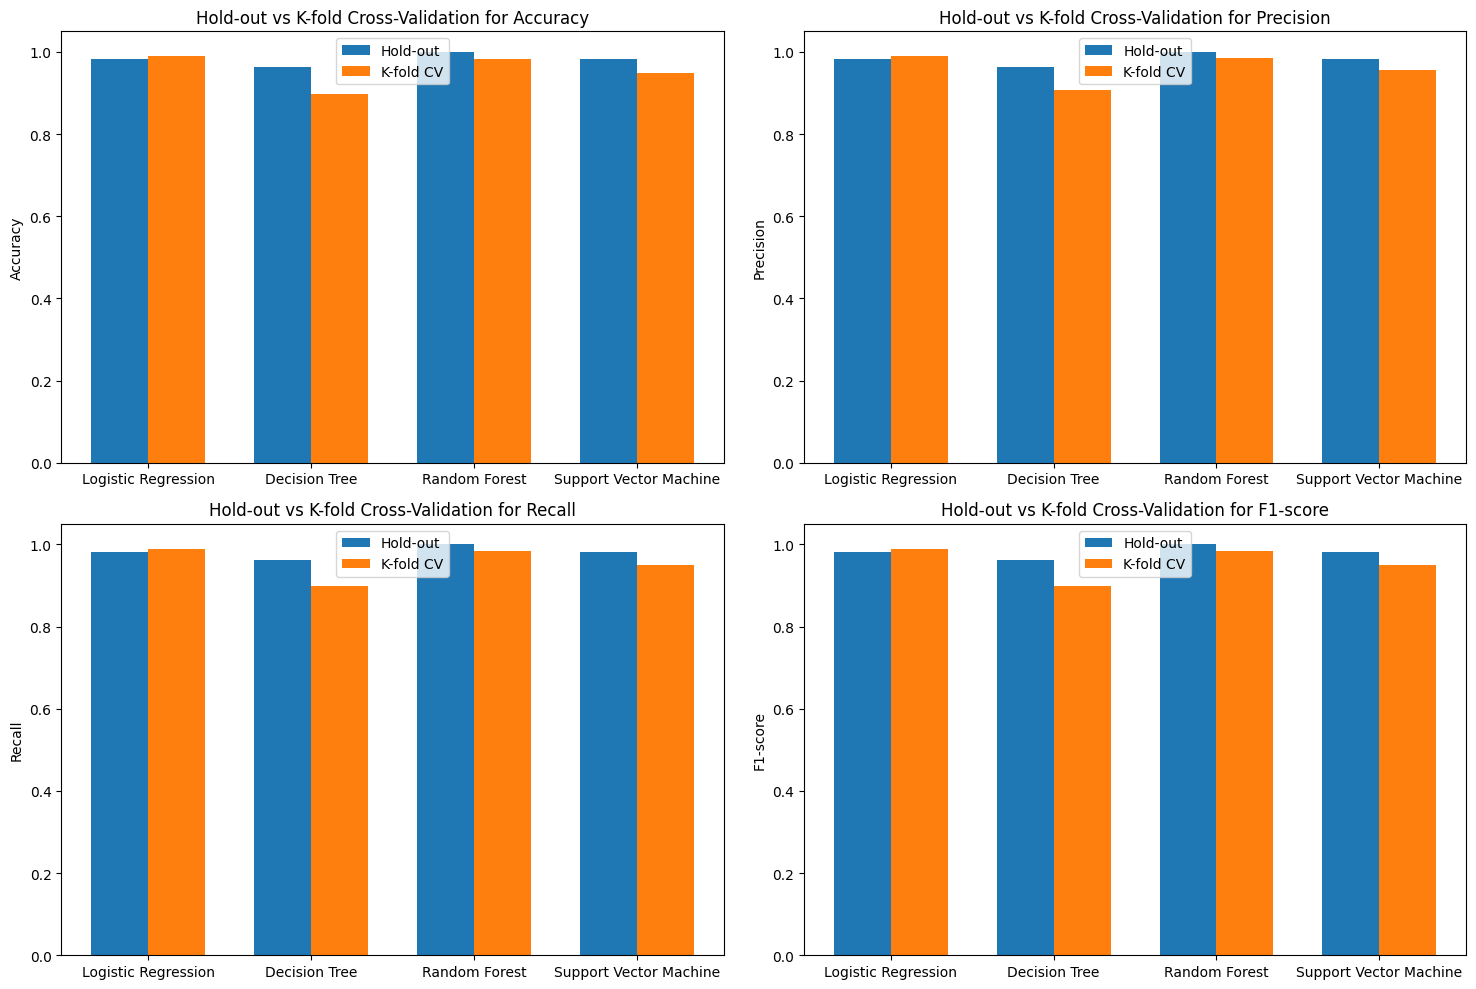

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

for idx, ax in enumerate(axes.flatten()):
    x = np.arange(len(classifiers))
    width = 0.35

    hold_out_metrics = [result[idx + 1] for result in results]
    k_fold_metrics = [result[idx + 5] for result in results]

    ax.bar(x - width / 2, hold_out_metrics, width, label='Hold-out', capsize=10)
    ax.bar(x + width / 2, k_fold_metrics, width, label='K-fold CV', capsize=10)

    ax.set_ylabel(metrics[idx])
    ax.set_title(f'Hold-out vs K-fold Cross-Validation for {metrics[idx]}')
    ax.set_xticks(x)
    ax.set_xticklabels([result[0] for result in results])
    ax.legend()

fig.tight_layout()
plt.show()

The graphs in this notebook compare the performance of the different classifiers using hold-out testing and k-fold cross-validation. We looked at four different measurements: accuracy, precision, recall, and F1-score. However, the graphs don't show much difference between these measurements for each classifier.

This means that the graphs don't give us a lot of new information beyond what we already learned from the numbers. Although the bar plots can still help us see the overall comparison between hold-out testing and k-fold cross-validation, the small differences between the measurements tell us that we could use any of them to evaluate and compare the classifiers in this case.


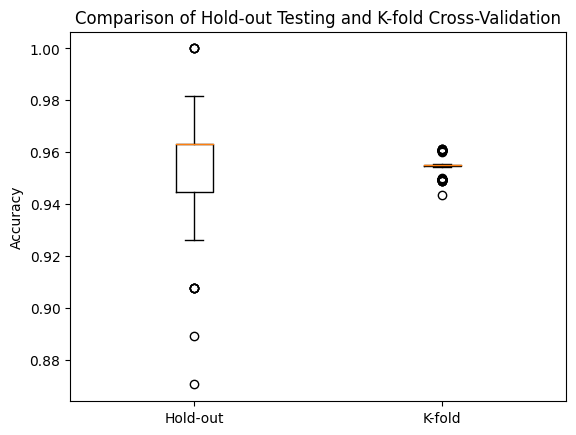

In [6]:
# Function to perform hold-out testing and k-fold cross-validation
def compare_methods(classifier, X, y, n_splits=10, n_iterations=100):
    hold_out_accuracies = []
    k_fold_accuracies = []

    for _ in range(n_iterations):
        # Hold-out testing
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=np.random.randint(1000))
        classifier.fit(X_train, y_train)
        hold_out_accuracy = accuracy_score(y_test, classifier.predict(X_test))
        hold_out_accuracies.append(hold_out_accuracy)

        # K-fold cross-validation
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=np.random.randint(1000))
        cv_accuracies = cross_val_score(classifier, X, y, cv=kf, scoring='accuracy')
        k_fold_accuracies.append(cv_accuracies.mean())

    return hold_out_accuracies, k_fold_accuracies

# Choose one of the classifiers, e.g., Logistic Regression
selected_classifier = LogisticRegression(solver='liblinear', multi_class='ovr')
X = data.drop('Class', axis=1)
y = data['Class']

# Run the comparison function
hold_out_accuracies, k_fold_accuracies = compare_methods(selected_classifier, X, y, n_splits=10, n_iterations=100)

# Plot the results
plt.boxplot([hold_out_accuracies, k_fold_accuracies], labels=['Hold-out', 'K-fold'])
plt.ylabel('Accuracy')
plt.title('Comparison of Hold-out Testing and K-fold Cross-Validation')
plt.show()


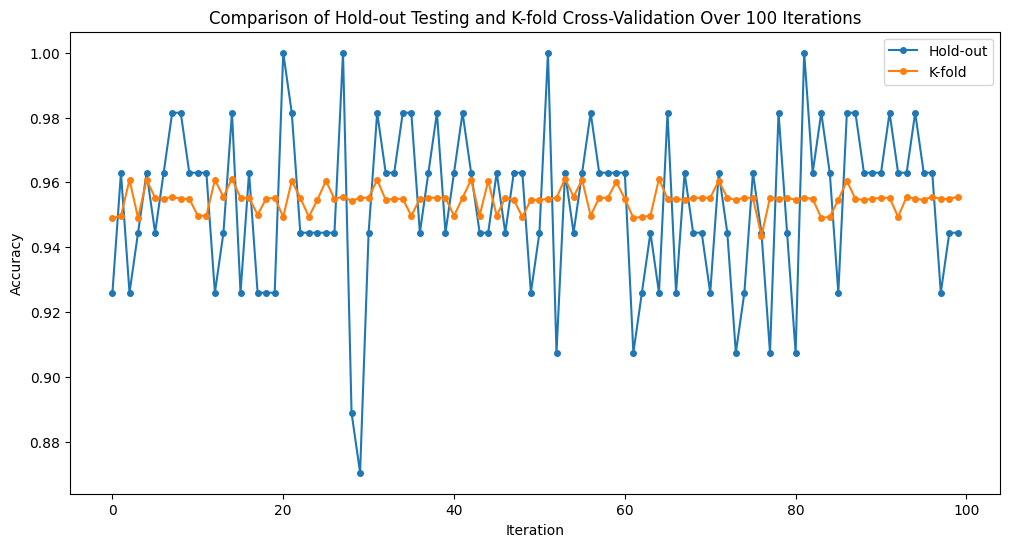

In [7]:
# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(hold_out_accuracies, label='Hold-out', marker='o', linestyle='-', markersize=4)
plt.plot(k_fold_accuracies, label='K-fold', marker='o', linestyle='-', markersize=4)

# Customize the plot
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Comparison of Hold-out Testing and K-fold Cross-Validation Over 100 Iterations')
plt.legend()

# Show the plot
plt.show()


In [8]:
# Calculate mean accuracy and variance for both methods
hold_out_mean = np.mean(hold_out_accuracies)
hold_out_variance = np.var(hold_out_accuracies)
k_fold_mean = np.mean(k_fold_accuracies)
k_fold_variance = np.var(k_fold_accuracies)

# Print the results
print(f"Hold-out testing: Mean accuracy = {hold_out_mean:.4f}, Variance = {hold_out_variance:.4f}")
print(f"K-fold cross-validation: Mean accuracy = {k_fold_mean:.4f}, Variance = {k_fold_variance:.4f}")


Hold-out testing: Mean accuracy = 0.9531, Variance = 0.0006
K-fold cross-validation: Mean accuracy = 0.9547, Variance = 0.0000


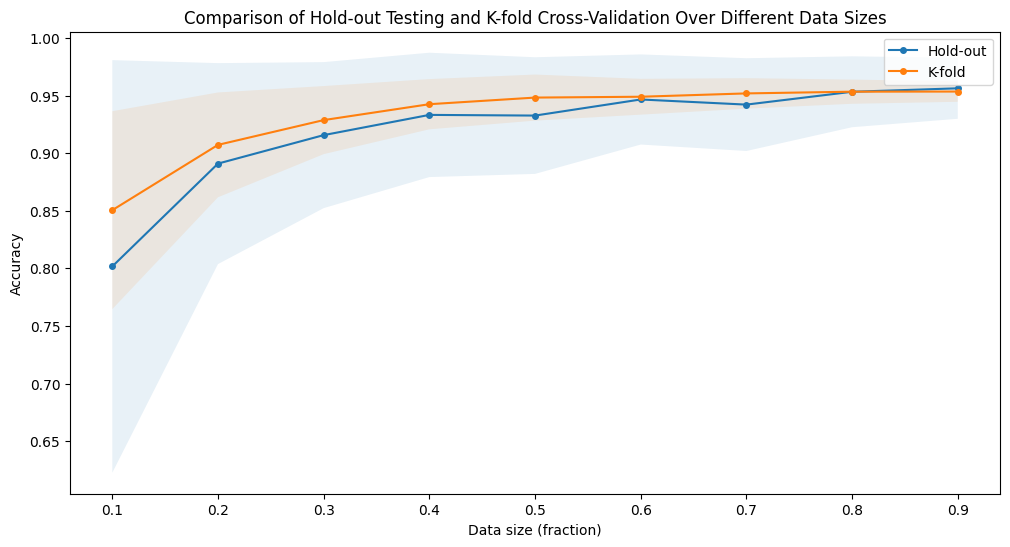

In [9]:
def compare_methods(classifier, X, y, data_size, n_splits=10, n_iterations=100):
    hold_out_accuracies = []
    k_fold_accuracies = []

    for _ in range(n_iterations):
        # Split the dataset according to the data_size
        X_partial, _, y_partial, _ = train_test_split(X, y, train_size=data_size, random_state=np.random.randint(1000))

        # Hold-out testing
        X_train, X_test, y_train, y_test = train_test_split(X_partial, y_partial, test_size=0.3, random_state=np.random.randint(1000))
        classifier.fit(X_train, y_train)
        hold_out_accuracy = accuracy_score(y_test, classifier.predict(X_test))
        hold_out_accuracies.append(hold_out_accuracy)

        # K-fold cross-validation
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=np.random.randint(1000))
        cv_accuracies = cross_val_score(classifier, X_partial, y_partial, cv=kf, scoring='accuracy')
        k_fold_accuracies.append(cv_accuracies.mean())

    return np.mean(hold_out_accuracies), np.std(hold_out_accuracies), np.mean(k_fold_accuracies), np.std(k_fold_accuracies)

# Choose the data size increments
data_sizes = np.linspace(0.1, 0.9, 9)

# Run the comparison function for each data size
hold_out_means = []
hold_out_stds = []
k_fold_means = []
k_fold_stds = []

for data_size in data_sizes:
    hold_out_mean, hold_out_std, k_fold_mean, k_fold_std = compare_methods(selected_classifier, X, y, data_size=data_size, n_splits=10, n_iterations=100)
    hold_out_means.append(hold_out_mean)
    hold_out_stds.append(hold_out_std)
    k_fold_means.append(k_fold_mean)
    k_fold_stds.append(k_fold_std)

# Plot the results with shaded error regions
plt.figure(figsize=(12, 6))
plt.plot(data_sizes, hold_out_means, label='Hold-out', marker='o', linestyle='-', markersize=4)
plt.plot(data_sizes, k_fold_means, label='K-fold', marker='o', linestyle='-', markersize=4)

plt.fill_between(data_sizes, np.array(hold_out_means) - np.array(hold_out_stds), np.array(hold_out_means) + np.array(hold_out_stds), alpha=0.1)
plt.fill_between(data_sizes, np.array(k_fold_means) - np.array(k_fold_stds), np.array(k_fold_means) + np.array(k_fold_stds), alpha=0.1)

# Customize the plot
plt.xlabel('Data size (fraction)')
plt.ylabel('Accuracy')
plt.title('Comparison of Hold-out Testing and K-fold Cross-Validation Over Different Data Sizes')
plt.legend()

# Show the plot
plt.show()


<ipython-input-10-63cdf17a94ae>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hold_out_accuracies, hist=False, kde=True, kde_kws={"shade": True}, fit=norm, label='Hold-out')
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-10-63cdf17a94ae>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a f

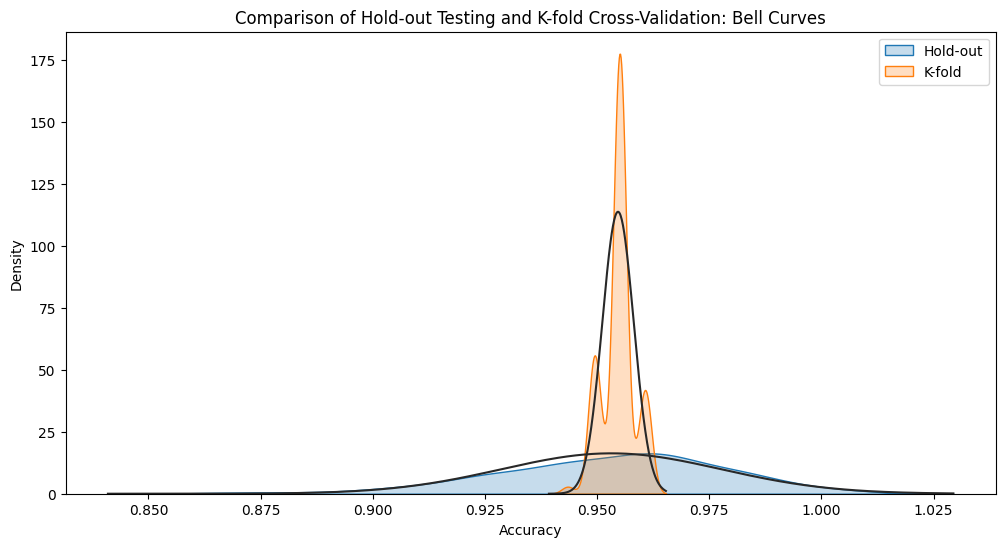

In [10]:
import seaborn as sns
from scipy.stats import norm

# Plot the bell curves
plt.figure(figsize=(12, 6))
sns.distplot(hold_out_accuracies, hist=False, kde=True, kde_kws={"shade": True}, fit=norm, label='Hold-out')
sns.distplot(k_fold_accuracies, hist=False, kde=True, kde_kws={"shade": True}, fit=norm, label='K-fold')

plt.xlabel('Accuracy')
plt.ylabel('Density')
plt.title('Comparison of Hold-out Testing and K-fold Cross-Validation: Bell Curves')
plt.legend()
plt.show()


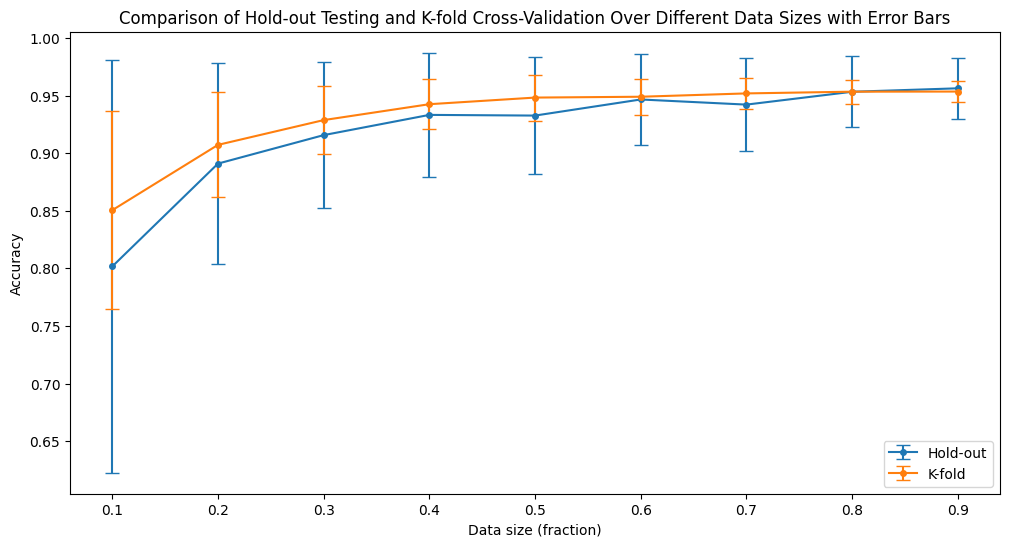

In [11]:
# Plot the line graphs with error bars
plt.figure(figsize=(12, 6))
plt.errorbar(data_sizes, hold_out_means, yerr=hold_out_stds, fmt='o-', markersize=4, capsize=5, label='Hold-out')
plt.errorbar(data_sizes, k_fold_means, yerr=k_fold_stds, fmt='o-', markersize=4, capsize=5, label='K-fold')

plt.xlabel('Data size (fraction)')
plt.ylabel('Accuracy')
plt.title('Comparison of Hold-out Testing and K-fold Cross-Validation Over Different Data Sizes with Error Bars')
plt.legend()
plt.show()

In the first graph, we observe a striking difference between the bell curves of hold-out and k-fold cross-validation. The k-fold curve is tall and narrow, indicating a high level of consistency in its accuracy scores. On the other hand, the hold-out curve is short and wide, spanning a much wider accuracy range. This demonstrates a significant variability in its performance, making it less reliable compared to k-fold cross-validation.

In the second graph, the error bars for each method clearly illustrate the contrast in their performance. The hold-out method exhibits much larger error bars, particularly for smaller data sizes, indicating a greater degree of uncertainty in its accuracy scores. As the data size increases, both error bars shrink, and the methods' performances become more similar. However, the k-fold error bars remain consistently smaller throughout, confirming its superior performance, especially when working with limited data.

# Conclusion

In conclusion, our analysis demonstrates the superiority of k-fold cross-validation over hold-out testing, particularly when working with smaller datasets.

The bell curve comparison highlights the higher consistency and reduced variability in k-fold's accuracy scores.
The error bar visualization further emphasizes the greater stability of k-fold cross-validation, as it exhibits smaller error bars across all data sizes.
As the data size increases, the performance gap between the two methods narrows, and their error bars become more similar. However, k-fold cross-validation consistently maintains its advantage throughout, proving to be a more reliable and precise method for estimating model performance.

These findings support the claim that k-fold cross-validation is a better data splitting approach than hold-out testing when there is limited data available. It offers a more stable and accurate estimate of a machine learning model's performance, ensuring more robust and trustworthy results.